## Lógica Fuzzy

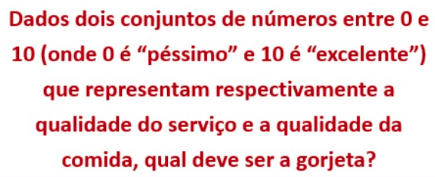

In [ ]:
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation

### Definindo as variáveis de entrada:

In [ ]:
# Definindo universo de discurso e nome da variável
universo = np.arange(0, 11)

qualidade = Antecedent(universe = universo, label = "qcomida")
servico = Antecedent(universe = universo, label = "qservico")

### Definindo as funções de pertinência de entrada:

In [ ]:
# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
qualidade["ruim"] = fuzzy.trapmf(qualidade.universe, [0, 0, 2, 5])
qualidade["bom"] = fuzzy.trimf(qualidade.universe, [3, 5, 7])
qualidade["excelente"] = fuzzy.trapmf(qualidade.universe, [5, 8, 10, 10])

servico["ruim"] = fuzzy.trapmf(servico.universe, [0, 0, 2, 5])
servico["bom"] = fuzzy.trimf(servico.universe, [3, 5, 7])
servico["excelente"] = fuzzy.trapmf(servico.universe, [5, 8, 10, 10])

qualidade.view()
servico.view()

### Definindo a variável Fuzzy de saída:

In [ ]:
# Universo da gorjeta
universo_gorjeta = np.arange(0, 21)

gorjeta = Consequent(universe = universo_gorjeta, label = "vgorjeta")

### Definindo as funções de pertinência de saída:

In [ ]:
gorjeta["pequena"] = fuzzy.trapmf(gorjeta.universe, [0, 0, 5, 8])
gorjeta["razoável"] = fuzzy.trimf(gorjeta.universe, [5, 10, 15])
gorjeta["generosa"] = fuzzy.trapmf(gorjeta.universe, [10, 15, 20, 20])

gorjeta.view()

### Definindo as regras de inferência:

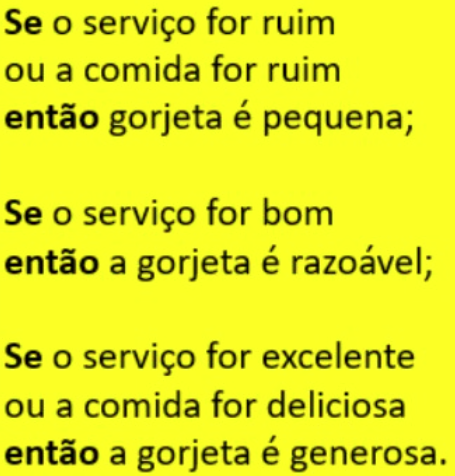

In [ ]:
regra1 = Rule(servico["ruim"] | qualidade["ruim"], gorjeta["pequena"])
regra2 = Rule(servico["bom"], gorjeta["razoável"])
regra3 = Rule(servico["excelente"] | qualidade["excelente"], gorjeta["generosa"])

# Adicionando regras ao controle
gorjeta_controle = ControlSystem([regra1, regra2, regra3])

### Criando o sistema e testando:

In [ ]:
# Criando sistema com o controle de gorjeta
sistema = ControlSystemSimulation(gorjeta_controle)

sistema.input["qcomida"] = 4
sistema.input["qservico"] = 6

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['vgorjeta']}")

gorjeta.view(sim = sistema)